In [66]:
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [68]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from pandas import DataFrame
from numpy import log

In [70]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_american_clean.xlsx')

In [71]:
df_american = df_american.set_index(['date'])

In [72]:
df_american.head()

,pax_count,revenue,seat_miles,load_factor,flights
date,,,,,
2003-01-01,7013818,9405547,14038698,67.00,78214
2003-02-01,6363926,8355084,12142241,68.81,67463
2003-03-01,7628481,9981627,13929984,71.66,77125
2003-04-01,7103085,9325622,13210596,70.59,73182
2003-05-01,7447462,9838460,13345197,73.72,73381


# Holt-Winters

## Data split

In [73]:
X = df_american['pax_count']
size = int(len(X) * 0.8)
training_set, test_set = X[0:size], X[size:len(X)]
test_set.head(10)

date
2016-08-01    12704813
2016-09-01    11220742
2016-10-01    11764077
2016-11-01    11169788
2016-12-01    11695734
2017-01-01    11051300
2017-02-01    10167600
2017-03-01    12532952
2017-04-01    12059664
2017-05-01    12682795
Name: pax_count, dtype: int64

In [74]:
training_set.tail(10)

date
2015-10-01    12419858
2015-11-01    11520798
2015-12-01    12091996
2016-01-01    11281553
2016-02-01    10561759
2016-03-01    12635859
2016-04-01    11830169
2016-05-01    12614397
2016-06-01    13146977
2016-07-01    13563881
Name: pax_count, dtype: int64

<AxesSubplot:xlabel='date'>

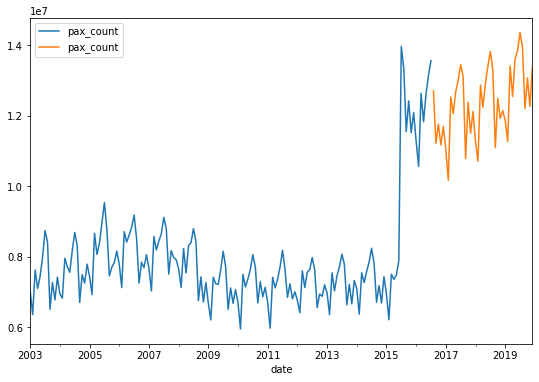

In [75]:
training_set.plot(figsize = (9,6), legend = True)
test_set.plot(legend = True)

### Model fitting

#### Multiplicative

In [76]:
fitted_model_mul = ExponentialSmoothing(training_set,
                             trend= 'mul',
                             seasonal = 'mul',
                             seasonal_periods= 12).fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


#### Additiv

In [77]:
fitted_model_add = ExponentialSmoothing(training_set,
                             trend= 'add',
                             seasonal = 'add',
                             seasonal_periods= 12).fit()

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [78]:
print(fitted_model_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                pax_count   No. Observations:                  163
Model:             ExponentialSmoothing   SSE                 41249554058803.055
Optimized:                         True   AIC                           4311.877
Trend:                   Multiplicative   BIC                           4361.377
Seasonal:                Multiplicative   AICC                          4316.627
Seasonal Periods:                    12   Date:                 Fri, 25 Nov 2022
Box-Cox:                          False   Time:                         22:53:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9242857                alpha                 True
smoothing_trend          

In [79]:
print(fitted_model_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                pax_count   No. Observations:                  163
Model:             ExponentialSmoothing   SSE                 40132239465999.320
Optimized:                         True   AIC                           4307.400
Trend:                         Additive   BIC                           4356.901
Seasonal:                      Additive   AICC                          4312.150
Seasonal Periods:                    12   Date:                 Fri, 25 Nov 2022
Box-Cox:                          False   Time:                         22:53:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8535714                alpha                 True
smoothing_trend          

### Predictions 

In [80]:
predictions_hw_mul = fitted_model_mul.forecast(steps = len(test_set)).rename("Holt-Winters")

/Users/dilianaserafimova/Ananconda/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [81]:
predictions_hw_mul.tail()

2019-08-01    1.399066e+07
2019-09-01    1.164999e+07
2019-10-01    1.235859e+07
2019-11-01    1.165636e+07
2019-12-01    1.250366e+07
Freq: MS, Name: Holt-Winters, dtype: float64

In [82]:
predictions_hw_add = fitted_model_add.forecast(steps = len(test_set)).rename("Holt-Winters")

In [83]:
predictions_hw_add.head()

2016-08-01    1.304767e+07
2016-09-01    1.162580e+07
2016-10-01    1.212232e+07
2016-11-01    1.165109e+07
2016-12-01    1.218028e+07
Freq: MS, Name: Holt-Winters, dtype: float64

### Visualization

<AxesSubplot:xlabel='date'>

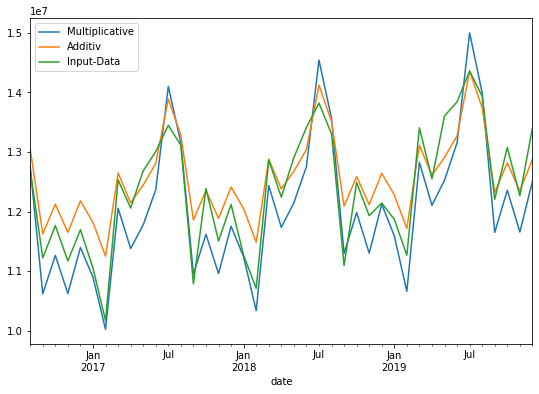

In [84]:
predictions_hw_mul.plot(legend = True, label = 'Multiplicative', figsize = (9,6))
predictions_hw_add.plot(legend = True, label = 'Additiv')
test_set.plot(legend = True, label = 'Input-Data')

### Model assessment

#### MAE and RMSE

In [85]:
print(round(mean_absolute_error(test_set, predictions_hw_mul),2))


482550.28


In [86]:
print(round(mean_absolute_error(test_set, predictions_hw_add),2))

370653.95


In [87]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_hw_mul)), 2))

548867.34


In [88]:
print(round(np.sqrt(mean_squared_error(test_set, predictions_hw_add)), 2))

464826.38


#### MAPE function

In [89]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [90]:
round(MAPE(test_set, predictions_hw_mul),2)

3.85

In [91]:
round(MAPE(test_set, predictions_hw_add),2)

3.13

### Export Forecast

In [56]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines

/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/American Airlines


In [57]:
predictions_hw_mul.to_csv('predictions_hw_mul.csv', index = True)

In [58]:
predictions_hw_add.to_csv('predictions_hw_add.csv', index = True)